In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


In [3]:
# Load the Fashion MNIST dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Print shapes to verify
print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)

Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


In [6]:
# Reshape to add channel dimension and normalize
X_train = X_train.reshape(-1, 28, 28, 1) / 255.0
X_test = X_test.reshape(-1, 28, 28, 1) / 255.0

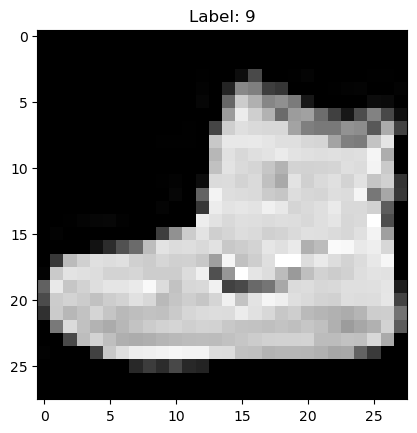

In [8]:
plt.imshow(X_train[0].reshape(28, 28), cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.show()

In [10]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # 10 classes for Fashion MNIST
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Display the model summary
model.summary()

C:\Users\roop1\OneDrive\New folder\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7685 - loss: 0.6392 - val_accuracy: 0.8709 - val_loss: 0.3493
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8862 - loss: 0.3118 - val_accuracy: 0.8931 - val_loss: 0.2945
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9033 - loss: 0.2588 - val_accuracy: 0.8988 - val_loss: 0.2754
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9158 - loss: 0.2239 - val_accuracy: 0.9045 - val_loss: 0.2615
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9258 - loss: 0.1992 - val_accuracy: 0.9097 - val_loss: 0.2615


In [14]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9078 - loss: 0.2656
Test accuracy: 90.97%


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Predicted label: 9
Actual label: 9


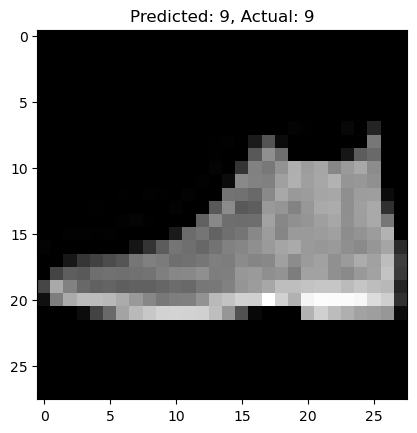

In [16]:
# Make predictions on the test set
predictions = model.predict(X_test)

# Get the predicted label for the first image
predicted_label = np.argmax(predictions[0])
print("Predicted label:", predicted_label)
print("Actual label:", y_test[0])

# Visualize the first test image with prediction
plt.imshow(X_test[0].reshape(28, 28), cmap='gray')
plt.title(f"Predicted: {predicted_label}, Actual: {y_test[0]}")
plt.show()

In [18]:
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9358 - loss: 0.1721 - val_accuracy: 0.9065 - val_loss: 0.2593
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9413 - loss: 0.1554 - val_accuracy: 0.9108 - val_loss: 0.2554
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9510 - loss: 0.1349 - val_accuracy: 0.9070 - val_loss: 0.2805
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9543 - loss: 0.1218 - val_accuracy: 0.9167 - val_loss: 0.2669
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9602 - loss: 0.1034 - val_accuracy: 0.9103 - val_loss: 0.2999


In [19]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9089 - loss: 0.3112
Test accuracy: 91.03%


In [22]:
model.save("fashion_cnn_model.h5")

In [24]:
from tensorflow.keras.models import load_model
model = load_model("fashion_cnn_model.h5")

In [34]:
import numpy as np
from PIL import Image

def predict_image(image_path):
    # Load and preprocess the image
    img = Image.open(image_path).convert("L").resize((28,28))
    img_array = np.array(img) / 255.0
    img_array = img_array.reshape(1, 28, 28, 1)
    
    prediction = model.predict(img_array)
    predicted_label = np.argmax(prediction[0])
    return predicted_label

# Test on a sample image (make sure it's in the right format)
print(predict_image(r"C:\temp\nature-2642042_1280.jpg"))

image_list = [
    r"C:\temp\nature-2642042_1280.jpg",  # Your first image (if you want to include it)
    r"C:\temp\marvin-meyer-SYTO3xs06fU-unsplash.jpg"  # The new image
]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
9


In [46]:
from PIL import Image

def create_mood_board(image_paths, board_size=(800, 800), grid=(2, 2)):
    """
    Create a mood board collage from a list of image paths.
    
    Parameters:
      image_paths (list): List of paths to images.
      board_size (tuple): Size of the final board (width, height).
      grid (tuple): Grid dimensions (columns, rows).
    
    Returns:
      A PIL Image object representing the collage.
    """
    board = Image.new('RGB', board_size, (255, 255, 255))
    grid_width = board_size[0] // grid[0]
    grid_height = board_size[1] // grid[1]
    
    for index, img_path in enumerate(image_paths):
        try:
            img = Image.open(img_path).resize((grid_width, grid_height))
            x = (index % grid[0]) * grid_width
            y = (index // grid[0]) * grid_height
            board.paste(img, (x, y))
        except Exception as e:
            print(f"Error loading {img_path}: {e}")
    
    return board

# Example usage:
mood_board = create_mood_board(image_list, board_size=(800, 800), grid=(2, 2))
mood_board.show()

In [87]:
def classify_images_in_folders(folders):
    predictions = {}
    for folder in folders:
        print(f"Processing folder: {folder}")
        try:
            files = os.listdir(folder)
        except Exception as e:
            print(f"Error listing files in {folder}: {e}")
            continue
        for filename in files:
            print("Found file:", filename)
            # Include .jfif along with other image extensions
            if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.jfif')):
                image_path = os.path.join(folder, filename)
                print("Processing image:", image_path)
                try:
                    predicted_label = predict_image(image_path)
                    print("Predicted label:", predicted_label)
                    if predicted_label is not None:
                        if predicted_label not in predictions:
                            predictions[predicted_label] = []
                        predictions[predicted_label].append(image_path)
                except Exception as e:
                    print(f"Error processing {image_path}: {e}")
    return predictions

# Update folder paths:
folder1 = r"C:\temp\aish"
folder2 = r"C:\temp\mood"

# Classify images in both folders.
grouped_predictions = classify_images_in_folders([folder1, folder2])
print("Grouped Predictions:")
print(grouped_predictions)


Processing folder: C:\temp\aish
Found file: 0469255a-7010-40ba-bccc-c9ccd6217a6a.jfif
Processing image: C:\temp\aish\0469255a-7010-40ba-bccc-c9ccd6217a6a.jfif
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Predicted label: 8
Found file: 0fb4fc07-c65d-4557-b44c-ef42174b6cb6.jfif
Processing image: C:\temp\aish\0fb4fc07-c65d-4557-b44c-ef42174b6cb6.jfif
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predicted label: 8
Found file: 1f0ef1ab-193d-49fa-ad81-5c2141f1866b.jfif
Processing image: C:\temp\aish\1f0ef1ab-193d-49fa-ad81-5c2141f1866b.jfif
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Predicted label: 6
Found file: 46733814-68ac-44b7-8cf5-5a2466870404.jfif
Processing image: C:\temp\aish\46733814-68ac-44b7-8cf5-5a2466870404.jfif
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicted label: 0
Found file: 4cd26838-01eb-4197-a730-85329ecc2275.jfif
Processing image: C:\temp\aish\4cd26838-01eb-4197-a730-85329ecc2275.jfif
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Predicted label: 6
Found file: 801678e7-2343-4487-93c6-ff90495ec215

In [83]:
from PIL import Image
import math

def create_mood_board(image_paths, board_size=(800, 800)):
    """
    Create a mood board collage from a list of image paths.
    
    Parameters:
      image_paths (list): List of image file paths.
      board_size (tuple): Size of the final board (width, height).
    
    Returns:
      A PIL Image object representing the collage.
    """
    num_images = len(image_paths)
    if num_images == 0:
        print("No images to display for this group.")
        return None
    
    # Calculate grid dimensions: try to make it as square as possible.
    grid_cols = math.ceil(math.sqrt(num_images))
    grid_rows = math.ceil(num_images / grid_cols)
    
    board = Image.new('RGB', board_size, (255, 255, 255))
    grid_width = board_size[0] // grid_cols
    grid_height = board_size[1] // grid_rows
    
    for index, img_path in enumerate(image_paths):
        try:
            img = Image.open(img_path).resize((grid_width, grid_height))
            x = (index % grid_cols) * grid_width
            y = (index // grid_cols) * grid_height
            board.paste(img, (x, y))
        except Exception as e:
            print(f"Error loading {img_path}: {e}")
    
    return board


In [111]:
from PIL import Image
import math

# Use the appropriate resampling filter
try:
    resample_method = Image.Resampling.LANCZOS
except AttributeError:
    resample_method = Image.ANTIALIAS

def create_masonry_board(image_paths, board_width=1200, num_columns=3, spacing=10):
    """
    Create a masonry layout mood board from a list of image paths.
    
    Parameters:
      image_paths (list): List of image file paths.
      board_width (int): Total width of the mood board.
      num_columns (int): Number of columns.
      spacing (int): Space (in pixels) between images.
      
    Returns:
      A PIL Image object representing the masonry layout mood board, or None if no images were processed.
    """
    # Calculate column width based on board width and spacing
    column_width = (board_width - (num_columns - 1) * spacing) // num_columns
    
    # Initialize columns and their heights
    columns = [[] for _ in range(num_columns)]
    column_heights = [0] * num_columns

    # Process each image
    for path in image_paths:
        try:
            img = Image.open(path)
            w, h = img.size
            new_height = int((column_width / w) * h)
            img = img.resize((column_width, new_height), resample_method)
            
            # Debug: print image size info
            print(f"Processed {path}: original size=({w}, {h}), resized to=({column_width}, {new_height})")
            
            # Find the column with the smallest current height
            min_col_index = column_heights.index(min(column_heights))
            columns[min_col_index].append((img, new_height))
            column_heights[min_col_index] += new_height + spacing
        except Exception as e:
            print(f"Error processing {path}: {e}")
    
    # Check if any images were processed
    if max(column_heights) == 0:
        print("No images were processed successfully.")
        return None
    
    board_height = max(column_heights) - spacing
    # Ensure board_height is positive
    if board_height <= 0:
        board_height = 100  # fallback minimal height
    
    print(f"Final board dimensions: width={board_width}, height={board_height}")
    
    board = Image.new('RGB', (board_width, board_height), (255, 255, 255))
    
    # Paste images into the board for each column
    for col_idx in range(num_columns):
        x = col_idx * (column_width + spacing)
        y = 0
        for img, new_height in columns[col_idx]:
            board.paste(img, (x, y))
            y += new_height + spacing
            
    return board

# Example usage:
image_list = [
    r"C:\temp\aish\Aishwariya Rai.jfif",
    r"C:\temp\mood\download.jfif",
    r"C:\temp\aish\Picture of Aishwarya Rai.jfif",
    r"C:\temp\aish\Aishwarya Rai (4).jfif",
    r"C:\temp\aish\SAATH CHALOGI_.jfif"
    
    # we can more images here.... these one were just demo's thats i mostly added Aishwarya's piccssss
]
mood_board = create_masonry_board(image_list, board_width=1200, num_columns=3, spacing=10)
if mood_board:
    mood_board.show()
else:
    print("Failed to create mood board.")


Processed C:\temp\aish\Aishwariya Rai.jfif: original size=(624, 833), resized to=(393, 524)
Processed C:\temp\mood\download.jfif: original size=(736, 1596), resized to=(393, 852)
Processed C:\temp\aish\Picture of Aishwarya Rai.jfif: original size=(736, 982), resized to=(393, 524)
Processed C:\temp\aish\Aishwarya Rai (4).jfif: original size=(736, 1104), resized to=(393, 589)
Processed C:\temp\aish\SAATH CHALOGI_.jfif: original size=(540, 960), resized to=(393, 698)
Final board dimensions: width=1200, height=1232


In [109]:
import os
import random
import math
from PIL import Image, ImageEnhance, ImageOps

# Use the appropriate resampling filter (for resizing)
try:
    resample_method = Image.Resampling.LANCZOS
except AttributeError:
    resample_method = Image.ANTIALIAS

def create_masonry_board(image_paths, board_width=1200, num_columns=3, spacing=10, border=2, border_color=(0, 0, 0)):
    """
    Create a masonry layout mood board from a list of image paths.

    Parameters:
      image_paths (list): List of image file paths.
      board_width (int): Total width of the mood board.
      num_columns (int): Number of columns.
      spacing (int): Space (in pixels) between images.
      border (int): Width of the border to add around each image.
      border_color (tuple): Color of the border (R, G, B).
      
    Returns:
      A PIL Image object representing the masonry layout mood board, or None if no images were processed.
    """
    # Calculate column width based on board width and spacing
    column_width = (board_width - (num_columns - 1) * spacing) // num_columns

    # Initialize columns and track their heights
    columns = [[] for _ in range(num_columns)]
    column_heights = [0] * num_columns

    # Process each image
    for path in image_paths:
        try:
            img = Image.open(path)
            w, h = img.size
            # Calculate new height to maintain aspect ratio for the given column width
            new_height = int((column_width / w) * h)
            img = img.resize((column_width, new_height), resample_method)
            
            # Add a border around the image to visually separate it
            img = ImageOps.expand(img, border=border, fill=border_color)
            new_width, new_height = img.size
            
            # Debug info
            print(f"Processed {path}: original size=({w}, {h}), resized to=({new_width}, {new_height})")
            
            # Assign the image to the column with the smallest current height
            min_col_index = column_heights.index(min(column_heights))
            columns[min_col_index].append((img, new_height))
            column_heights[min_col_index] += new_height + spacing
        except Exception as e:
            print(f"Error processing {path}: {e}")

    # Check if any images were processed
    if max(column_heights) == 0:
        print("No images were processed successfully.")
        return None

    # Compute the final board height
    board_height = max(column_heights) - spacing
    if board_height <= 0:
        board_height = 100  # Fallback minimal height

    print(f"Final board dimensions: width={board_width}, height={board_height}")

    # Create a blank canvas for the mood board
    board = Image.new('RGB', (board_width, board_height), (255, 255, 255))

    # Paste images into the board for each column
    for col_idx in range(num_columns):
        x = col_idx * (column_width + spacing)
        y = 0
        for img, img_height in columns[col_idx]:
            board.paste(img, (x, y))
            y += img_height + spacing

    return board

def main():
    # Define your image list (adjust paths as needed)
    image_list = [
        r"C:\temp\aish\Aishwariya Rai.jfif",
        r"C:\temp\mood\download.jfif",
        r"C:\temp\aish\Picture of Aishwarya Rai.jfif",
        r"C:\temp\aish\Aishwarya Rai (4).jfif",
        r"C:\temp\aish\SAATH CHALOGI_.jfif"
        
        # Add more images here if available
    ]
    
    # Create the mood board using the masonry layout
    mood_board = create_masonry_board(
        image_list,
        board_width=1200,
        num_columns=3,
        spacing=10,
        border=2,               # You can adjust the border width
        border_color=(0, 0, 0)    # Black border; adjust as desired
    )
    
    if mood_board:
        output_file = r"C:\temp\moodboard_output.jpg"
        mood_board.save(output_file)
        print(f"Mood board created and saved as {output_file}")
    else:
        print("Failed to create mood board.")

if __name__ == '__main__':
    main()


Processed C:\temp\aish\Aishwariya Rai.jfif: original size=(624, 833), resized to=(397, 528)
Processed C:\temp\mood\download.jfif: original size=(736, 1596), resized to=(397, 856)
Processed C:\temp\aish\Picture of Aishwarya Rai.jfif: original size=(736, 982), resized to=(397, 528)
Processed C:\temp\aish\Aishwarya Rai (4).jfif: original size=(736, 1104), resized to=(397, 593)
Processed C:\temp\aish\SAATH CHALOGI_.jfif: original size=(540, 960), resized to=(397, 702)
Final board dimensions: width=1200, height=1240
Mood board created and saved as C:\temp\moodboard_output.jpg


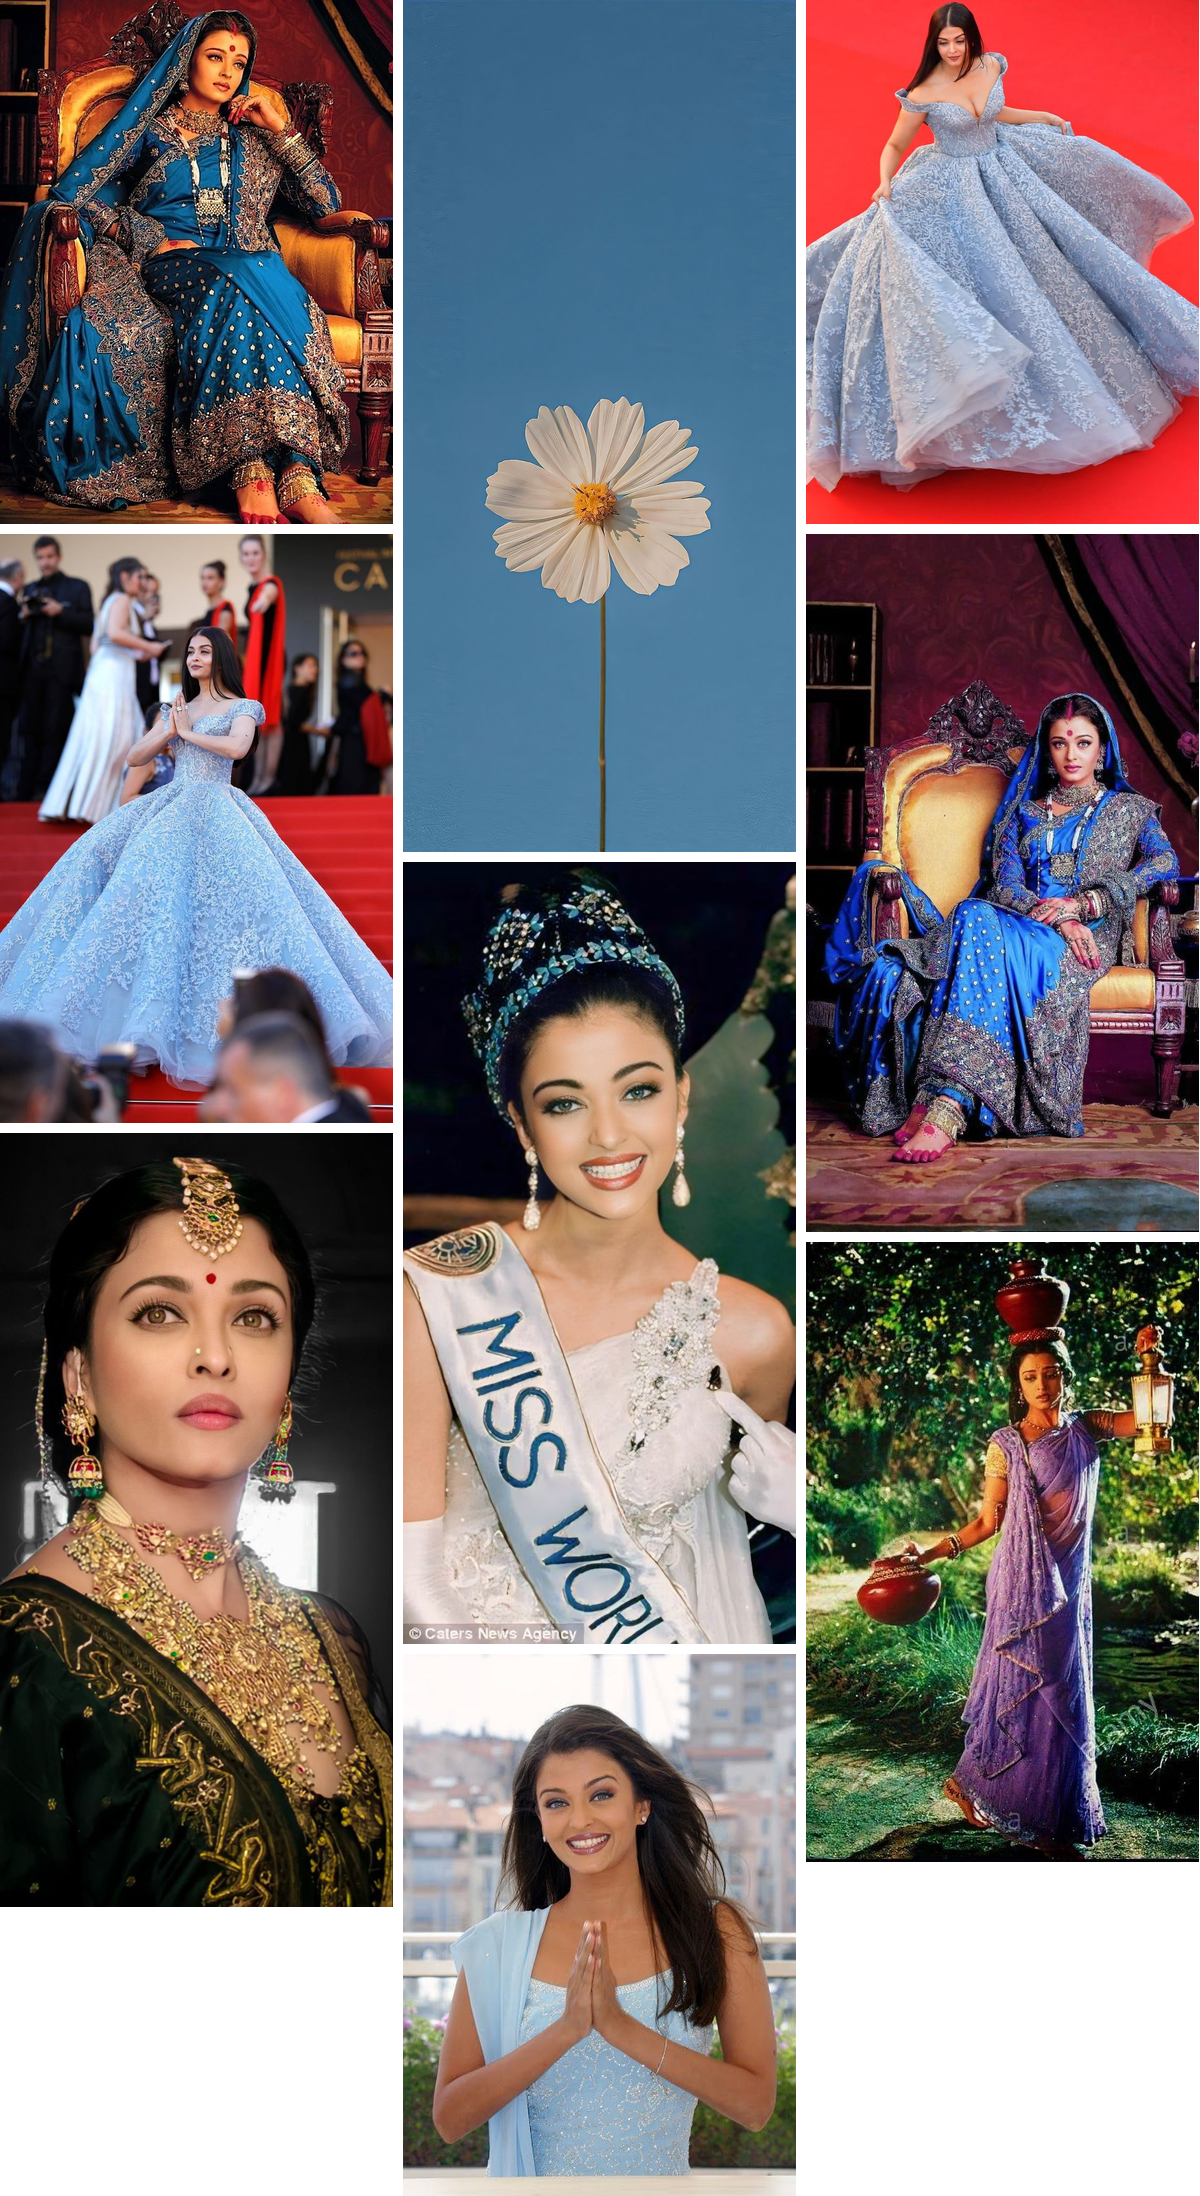

In [105]:
from IPython.display import display
display(mood_board)
